In [1]:
from model_visit import VisitModel
from model_image import Resnet
from model_multimodal import MultiModal
import tensorflow as tf
import numpy as np
import pandas as pd
import sys
import os


os.environ["CUDA_VISIBLE_DEVICES"] = '7'
table = pd.read_csv("../data/valid.txt", header=None)
filenames1 = [item[0] for item in table.values]
filenames2 = [item[0].split('/')[-1].split('.')[0] for item in table.values]

graph1 = tf.Graph()
sess_visit = tf.InteractiveSession(graph=graph1)
with sess_visit.graph.as_default():
    with sess_visit.as_default():
        visit_model = VisitModel()
        sess_visit.run(tf.local_variables_initializer())
        sess_visit.run(tf.global_variables_initializer())
        var_list = [var for var in tf.global_variables() if "moving" in var.name]
        var_list += [var for var in tf.global_variables() if "global_step" in var.name]
        var_list += tf.trainable_variables()
        saver1 = tf.train.Saver(var_list=var_list, max_to_keep=1)
        saver1.restore(sess_visit, "../model/1007/model.ckpt-2000")
        
graph2 = tf.Graph()
sess_image = tf.InteractiveSession(graph=graph2)
with sess_image.graph.as_default():
    with sess_image.as_default():
        image_model = Resnet()
        sess_image.run(tf.local_variables_initializer())
        sess_image.run(tf.global_variables_initializer())
        var_list = [var for var in tf.global_variables() if "moving" in var.name]
        var_list += [var for var in tf.global_variables() if "global_step" in var.name]
        var_list += tf.trainable_variables()
        saver2 = tf.train.Saver(var_list=var_list, max_to_keep=1)
        saver2.restore(sess_image, "../model/1006/model.ckpt-4000")            
        
        
graph3 = tf.Graph()
sess_multi = tf.InteractiveSession(graph=graph3)
with sess_multi.graph.as_default():
    with sess_multi.as_default():
        multi_model = MultiModal()
        sess_multi.run(tf.local_variables_initializer())
        sess_multi.run(tf.global_variables_initializer())
        var_list = [var for var in tf.global_variables() if "moving" in var.name]
        var_list += [var for var in tf.global_variables() if "global_step" in var.name]
        var_list += tf.trainable_variables()
        saver3 = tf.train.Saver(var_list=var_list, max_to_keep=1)
        saver3.restore(sess_multi, "../model/1012/model.ckpt-1000")       

Tensor("Resnet/stage1/Relu:0", shape=(?, 7, 26, 32), dtype=float32)
Tensor("Resnet/stage2/residual/Relu_2:0", shape=(?, 7, 26, 64), dtype=float32)
Tensor("Resnet/stage3/residual/Relu_2:0", shape=(?, 4, 13, 128), dtype=float32)
Tensor("Resnet/stage4/residual/Relu_2:0", shape=(?, 2, 7, 256), dtype=float32)
Tensor("Resnet/stage5/residual/Relu_2:0", shape=(?, 1, 4, 512), dtype=float32)
Tensor("Resnet/stage5/AvgPool:0", shape=(?, 1, 1, 512), dtype=float32)
Tensor("Resnet/fc/flatten/Reshape:0", shape=(?, 512), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

网络初始化成功
INFO:tensorflow:Restoring parameters from ../model/1007/model.ckpt-2000
Tensor("Resnet/stage1/Relu:0", shape=(?, 88, 88, 16), dtype=float32)


/root/anaconda3/envs/czczcz/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Resnet/stage2/residual/Relu_2:0", shape=(?, 44, 44, 32), dtype=float32)
Tensor("Resnet/stage3/residual/Relu_2:0", shape=(?, 22, 22, 64), dtype=float32)
Tensor("Resnet/stage4/residual/Relu_2:0", shape=(?, 11, 11, 128), dtype=float32)
Tensor("Resnet/stage5/residual/Relu_2:0", shape=(?, 6, 6, 256), dtype=float32)
Tensor("Resnet/stage5/AvgPool:0", shape=(?, 1, 1, 256), dtype=float32)
Tensor("Resnet/fc/flatten/Reshape:0", shape=(?, 256), dtype=float32)
网络初始化成功
INFO:tensorflow:Restoring parameters from ../model/1006/model.ckpt-4000
网络初始化成功
INFO:tensorflow:Restoring parameters from ../model/1012/model.ckpt-1000


测试完成
[117, 118, 104, 79, 117, 75, 120, 102, 116]
[0.585, 0.59, 0.52, 0.395, 0.585, 0.375, 0.6, 0.51, 0.58]
0.5266666666666666


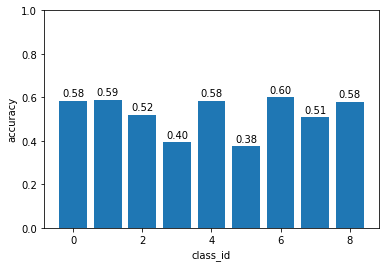

In [2]:
predictions = {}
length = len(filenames2)
data = []
labels = []
for index, filename in enumerate(filenames2):
    array = np.load("../data/train_visit/"+filename+".npy")
    class_id = int(filename.split('_')[-1])
    data.append(array)
    labels.append(class_id)

predictions = sess_visit.run(tf.argmax(visit_model.output, 1), 
                          feed_dict={visit_model.image: data, 
                                     visit_model.training: False})
softmax_visit = sess_visit.run(tf.nn.softmax(visit_model.output), 
                          feed_dict={visit_model.image: data, 
                                     visit_model.training: False})
print("测试完成")
scores = [0,0,0,0,0,0,0,0,0]
for index, prediction in enumerate(predictions):
    if(labels[index] == prediction+1):
        scores[prediction] += 1
print(scores)

avg = [score/200 for score in scores]
print(avg)
print(sum(scores)/1800)

import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(len(avg)), avg)
plt.xlabel('class_id')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
for x,y in zip(range(len(avg)),avg):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom')
plt.show()

测试完成
[20, 16, 64, 92, 150, 54, 98, 25, 54]
[0.1, 0.08, 0.32, 0.46, 0.75, 0.27, 0.49, 0.125, 0.27]
0.31833333333333336


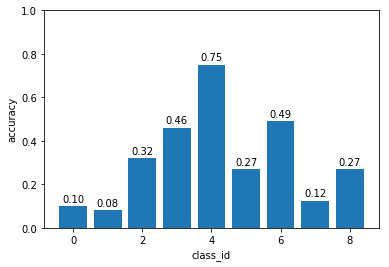

In [3]:
import cv2

predictions = {}
length = len(filenames1)
data = []
labels = []
for index, filename in enumerate(filenames1):
    image = cv2.imread(filename, cv2.IMREAD_COLOR)[0:88,0:88,:] / 255.0
    class_id = int(filename.split('_')[-1].split('.')[0])
    data.append(image)
    labels.append(class_id)

predictions = sess_image.run(tf.argmax(image_model.output, 1), 
                          feed_dict={image_model.image: data, 
                                     image_model.training: False})
softmax_image = sess_image.run(tf.nn.softmax(image_model.output), 
                          feed_dict={image_model.image: data, 
                                     image_model.training: False})
print("测试完成")
scores = [0,0,0,0,0,0,0,0,0]
for index, prediction in enumerate(predictions):
    if(labels[index] == prediction+1):
        scores[prediction] += 1
print(scores)

avg = [score/200 for score in scores]
print(avg)
print(sum(scores)/1800)

import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(len(avg)), avg)
plt.xlabel('class_id')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
for x,y in zip(range(len(avg)),avg):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom')
plt.show()

[109, 115, 119, 108, 157, 82, 123, 100, 115]
[0.545, 0.575, 0.595, 0.54, 0.785, 0.41, 0.615, 0.5, 0.575]
0.5711111111111111


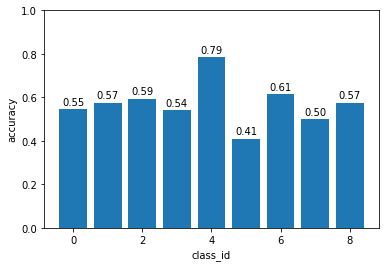

In [4]:
predictions = []


for i in range(len(softmax_image)):
    
    softmax_sum = softmax_image[i]+softmax_visit[i]
    prediction = np.argmax(softmax_sum)
    predictions.append(prediction)
    
scores = [0,0,0,0,0,0,0,0,0]
for index, prediction in enumerate(predictions):
    if(labels[index] == prediction+1):
        scores[prediction] += 1
print(scores)

avg = [score/200 for score in scores]
print(avg)
print(sum(scores)/1800)

import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(len(avg)), avg)
plt.xlabel('class_id')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
for x,y in zip(range(len(avg)),avg):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom')
plt.show()

测试完成
[134, 110, 127, 59, 169, 94, 103, 94, 116]
[0.67, 0.55, 0.635, 0.295, 0.845, 0.47, 0.515, 0.47, 0.58]
0.5588888888888889


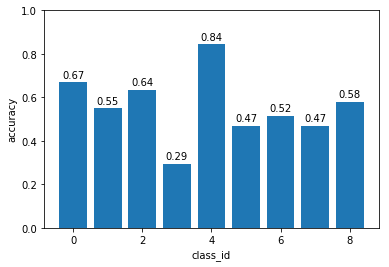

In [5]:
images = []
visits = []
labels = []

for i in range(len(filenames1)):
    image = cv2.imread(filenames1[i], cv2.IMREAD_COLOR)[0:88,0:88,:] / 255.0
    visit = np.load("../data/train_visit/"+filenames2[i]+".npy")
    class_id = int(filenames1[i].split('_')[-1].split('.')[0])
    images.append(image)
    visits.append(visit)
    labels.append(class_id)

predictions = sess_multi.run(tf.argmax(multi_model.prediction, 1), 
                          feed_dict={multi_model.image: images, 
                                     multi_model.visit: visits,
                                     multi_model.training: False})

softmax_multi = sess_multi.run(tf.nn.softmax(multi_model.prediction), 
                          feed_dict={multi_model.image: data, 
                                     multi_model.visit: visits,
                                     multi_model.training: False})

print("测试完成")
scores = [0,0,0,0,0,0,0,0,0]
for index, prediction in enumerate(predictions):
    if(labels[index] == prediction+1):
        scores[prediction] += 1
print(scores)

avg = [score/200 for score in scores]
print(avg)
print(sum(scores)/1800)

import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(len(avg)), avg)
plt.xlabel('class_id')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
for x,y in zip(range(len(avg)),avg):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom')
plt.show()

[132, 117, 139, 94, 178, 100, 123, 105, 123]
[0.66, 0.585, 0.695, 0.47, 0.89, 0.5, 0.615, 0.525, 0.615]
0.6172222222222222


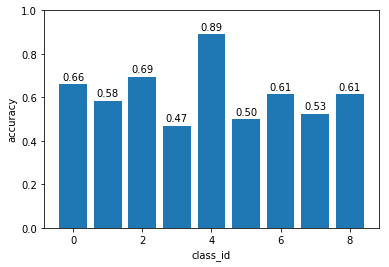

In [8]:
predictions = []


for i in range(len(softmax_image)):
    
    softmax_sum = softmax_image[i]+softmax_visit[i]+softmax_multi[i]
    prediction = np.argmax(softmax_sum)
    predictions.append(prediction)
    
scores = [0,0,0,0,0,0,0,0,0]
for index, prediction in enumerate(predictions):
    if(labels[index] == prediction+1):
        scores[prediction] += 1
print(scores)

avg = [score/200 for score in scores]
print(avg)
print(sum(scores)/1800)

import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(len(avg)), avg)
plt.xlabel('class_id')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
for x,y in zip(range(len(avg)),avg):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom')
plt.show()